# France
https://www.kaggle.com/lperez/coronavirus-france-dataset

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator
import geopandas
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def load_data(data_path):
    df = pd.read_csv(data_path + '/patient.csv')
    df['released_date'] = pd.to_datetime(df['released_date'])
    df['confirmed_date'] = pd.to_datetime(df['confirmed_date'])
    df['year'] = df['confirmed_date'].dt.year
    df['month'] = df['confirmed_date'].dt.month
    df['day'] = df['confirmed_date'].dt.day
    return df

def simulate_population_values(df, colname, population_size):
    mu, sigma = df[colname].mean(), df[colname].std() 
    return np.random.normal(mu, sigma, population_size)

In [3]:
def elbow_test(df, n_init, max_clusters, max_iter):
    distortions = []
    for i in range(1, max_clusters):
        km = KMeans(
            n_clusters=i, init='random',
            n_init=n_init, max_iter=max_iter,
            tol=1e-04, random_state=0
        )
        km.fit(df)
        distortions.append(km.inertia_)

    plt.plot(range(1, max_clusters), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()
    
    kn = KneeLocator(
        range(1, max_clusters),
        distortions,
        curve='convex',
        direction='decreasing',
        interp_method='interp1d',
    )
    return kn.knee

def plot_countries(df, title, country_column_name, column_name, n_clusters, legend=False):
    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    merged_inner = pd.merge(left=world, right=df, left_on='name',right_on=country_column_name, how='inner')
    cmap = cm.get_cmap('Spectral', n_clusters)
    ax = world.plot(figsize=(20,5), linewidth=0.25, edgecolor='white', color='lightgrey')
    ax.set_title(title)
    
    merged_inner.plot(column=column_name, ax=ax, cmap=cmap, legend=legend)
    plt.show()

In [4]:
df_france = load_data('coronavirusdataset_france')
df_france.isnull().sum()

id                  2067
sex                 1851
birth_year          1936
country                1
region                 1
departement          195
city                1804
group               1905
infection_reason    1906
infection_order     2068
infected_by         2056
contact_number      2073
confirmed_date         4
released_date       2064
deceased_date       2048
status              1481
health              1849
source               199
comments            1637
year                   4
month                  4
day                    4
dtype: int64

In [5]:
df_france.drop(['departement','region','comments', 'id', 'infected_by','health','city','source'],axis=1,inplace=True)
france_population = 65232273
s = simulate_population_values(df_france, 'birth_year', france_population)
df_france.fillna({'sex':'Unkown','birth_year':int(random.choice(s)),
                  'country':'France','infection_reason':'Unkown','group':'Unkown', 
                  'status':'Unknown','infection_order':0, 'contact_number':0} ,
                 inplace=True)

In [6]:
df_france.group.unique()

array(['Unkown', 'Mulhouse religious gathering', 'Montauban family',
       'Cahors family', 'Montpellier family', 'Montpellier family 2',
       'Alès family', 'Millau family', 'Montpellier family 3',
       'Crépy-en-Valois', 'Beaune family', 'group A', 'group B',
       'Montpellier family 4', 'Italian', 'Marseille family 4',
       'Marseille family 3', 'Roost-Warendin family',
       'Contact of first patient of Manche', 'cluster Contamines',
       'Auvergne couple 0', 'cluster balme sillingy',
       'cluster croisière nil egypt', 'cluster mulhouse',
       'Mulhouse Gathering', 'Dordogne famiily 1', 'Vienne family 1',
       'Cluster Auray', 'Cluster Méry-sur-Oise', 'cluster Bruz'],
      dtype=object)

In [7]:
df_france.infection_reason.unique()

array(['contact with patient', 'visit to Italy',
       'visit to Mulhouse religious gathering', 'Unkown',
       'contact with person who visited Italy', 'visit to Egypt',
       'unknown', 'visit to Oise', 'visit to Germany',
       'Visit to Venise, Italy', 'contact with patient in Auray',
       'visit to Mulhouse', 'visit to Milan', 'Italian',
       'visit to Lombardy', 'parishioner', 'Creil military base\xa0?',
       'visit to Senegal', 'visit to Alsace', 'visit in Lombardy',
       'visit to Bretagne', 'Visit in Italy',
       'In contact with someone contamitaminated in Oise',
       'Religious Meeting in Mulhouse', 'work in a medical environment ',
       'Visit family in Oise', 'health professional'], dtype=object)

In [8]:
df_france.isnull().sum()

sex                    0
birth_year             0
country                0
group                  0
infection_reason       0
infection_order        0
contact_number         0
confirmed_date         4
released_date       2064
deceased_date       2048
status                 0
year                   4
month                  4
day                    4
dtype: int64

In [9]:
df_france.infection_order.unique()

array([0., 2., 1.])

In [10]:
df_south_korea = load_data('coronavirusdataset_south_korea')
df_south_korea.head()

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,year,month,day
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released,2020,1,20
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released,2020,1,24
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released,2020,1,26
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released,2020,1,27
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released,2020,1,30


In [11]:
df_france.status.unique()

array(['released', 'hospital', 'home isolation', 'deceased', 'Unknown'],
      dtype=object)

In [12]:
df_south_korea.state.unique()

array(['released', 'isolated', 'deceased'], dtype=object)

In [13]:
df_france.rename({'status':'state'}, axis=1, inplace=True)
df_france['state'] = df_france['state'].apply(lambda x: 'isolated' if (x=='hospital' or x=='home isolation') else x)

In [14]:
df_south_korea.drop(['region','disease','patient_id','infected_by'], axis=1, inplace=True)
south_korea_population = 51256606
s = simulate_population_values(df_south_korea, 'birth_year', south_korea_population)
df_south_korea.fillna({'sex':'Unkown','infection_reason':'Unkown','group':'Unkown', 
                       'infection_order':0, 'contact_number':0, 
                       'state':'Unknown','birth_year':int(random.choice(s))} ,
                 inplace=True)

In [15]:
df_france.columns

Index(['sex', 'birth_year', 'country', 'group', 'infection_reason',
       'infection_order', 'contact_number', 'confirmed_date', 'released_date',
       'deceased_date', 'state', 'year', 'month', 'day'],
      dtype='object')

In [16]:
df_south_korea.columns

Index(['sex', 'birth_year', 'country', 'group', 'infection_reason',
       'infection_order', 'contact_number', 'confirmed_date', 'released_date',
       'deceased_date', 'state', 'year', 'month', 'day'],
      dtype='object')

In [17]:
df = df_france.append(df_south_korea, sort=False)
df = df[~df['year'].isnull()]

In [18]:
df['released_date'] = df[['released_date','deceased_date']].fillna(df['deceased_date'])
df['released_date'] = df[['released_date']].fillna(pd.to_datetime('today'))
df['infection_duration'] = pd.to_datetime(df['released_date']).sub(df['confirmed_date'], axis=0)
df = df[df['infection_duration'].dt.days>=0]
df['infection_duration'] = df['infection_duration'].dt.days
df.drop(['released_date','confirmed_date','deceased_date'], axis=1, inplace=True)
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)

In [19]:
df.isnull().sum()

sex                   0
birth_year            0
country               0
group                 0
infection_reason      0
infection_order       0
contact_number        0
state                 0
year                  0
month                 0
day                   0
infection_duration    0
dtype: int64

In [20]:
df.year.unique()

array([2020])

In [21]:
df.drop(['year'], axis=1, inplace=True)

In [22]:
df[df['country']=='Mongolia']

,sex,birth_year,country,group,infection_reason,infection_order,contact_number,state,month,day,infection_duration
874,male,1984.0,Mongolia,Unkown,Unkown,0.0,0.0,deceased,2,25,21


In [23]:
df[df['country']=='China']

,sex,birth_year,country,group,infection_reason,infection_order,contact_number,state,month,day,infection_duration
0,female,1984.0,China,Unkown,visit to Wuhan,1.0,45.0,released,1,20,17
11,male,1971.0,China,Unkown,contact with patient in Japan,2.0,422.0,released,2,1,17
13,female,1980.0,China,Unkown,contact with patient,3.0,3.0,released,2,2,16
22,female,1962.0,China,Unkown,visit to Wuhan,1.0,23.0,released,2,6,23
26,female,1982.0,China,Unkown,visit to China,1.0,40.0,isolated,2,9,37
27,female,1989.0,China,Unkown,contact with patient,2.0,1.0,released,2,10,7
754,male,1954.0,China,Eunpyeong St. Mary's Hospital,Unkown,0.0,0.0,isolated,2,24,22
923,female,1945.0,China,Unkown,visit to China,0.0,0.0,isolated,2,25,21


In [24]:
df['country'].unique()

array(['France', 'China', 'Korea', 'Mongolia'], dtype=object)

In [25]:
df = df[df['country']!='Mongolia']
df = df[df['country']!='China']

In [26]:
df['age'] = pd.to_datetime('today').year - df['birth_year'].astype(int)

In [27]:
def transform_reason(value):
    if ('religious' in value or 'parishioner' in value):
        return 'religious'
    elif ('visit' in value or 'residence' in value):
        return 'visit'
    elif ('contact' in value):
        return 'contact'
    elif ('medical' in value or 'health professional' in value):
        return 'medical'
    elif ('militar' in value):
        return 'militar'
    elif ('italian' in value):
        return 'italian'
    elif ('pilgrimage' in value):
        return 'pilgrimage'
    else:
        return 'unknown'

df['infection_reason'] = df['infection_reason'].str.lower()
df['reason'] = df['infection_reason'].apply(transform_reason)  
df = pd.concat([df, pd.get_dummies(df['reason'])], axis=1)
df.drop(['unknown'], axis=1, inplace=True)


In [28]:
df['sex'] = df['sex'].str.lower()
df["sex"].replace({"male\xa0?": "male"}, inplace=True)
dummies = pd.get_dummies(df['sex']).drop(['unkown'], axis=1)
df['female'] = dummies['female']
df['male'] = dummies['male']

In [29]:
df['contact_number'] = df['contact_number'].astype(int)

In [30]:
df = pd.concat([df, pd.get_dummies(df['country'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['state'], drop_first=True)], axis=1)

In [31]:
df.columns

Index(['sex', 'birth_year', 'country', 'group', 'infection_reason',
       'infection_order', 'contact_number', 'state', 'month', 'day',
       'infection_duration', 'age', 'reason', 'contact', 'italian', 'medical',
       'militar', 'pilgrimage', 'religious', 'visit', 'female', 'male',
       'France', 'Korea', 'deceased', 'isolated', 'released'],
      dtype='object')

In [32]:
df.reason.unique()

array(['visit', 'contact', 'religious', 'unknown', 'italian', 'militar',
       'medical', 'pilgrimage'], dtype=object)

In [33]:
min_max_scaler = preprocessing.MinMaxScaler()
x = min_max_scaler.fit_transform(df.drop(['infection_reason', 'reason','country', 'group','birth_year','sex','state'], axis=1))

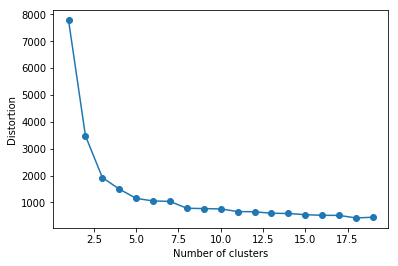

4


In [34]:
n_clusters = elbow_test(x, 10, 20, 300)
print(n_clusters)

In [35]:
km = KMeans(n_clusters=n_clusters, random_state=20)
y = km.fit_predict(x)
df['cluster'] = km.labels_

In [93]:
df[df['cluster']==0].head(20)

,sex,birth_year,country,group,infection_reason,infection_order,contact_number,state,month,day,...,religious,visit,female,male,France,Korea,deceased,isolated,released,cluster
12,male,1992.0,Korea,Unkown,residence in wuhan,1.0,0,released,2,2,...,0,1,0,1,0,1,0,0,1,0
14,male,1977.0,Korea,Unkown,contact with patient,2.0,15,released,2,2,...,0,0,0,1,0,1,0,0,1,0
15,female,1977.0,Korea,Unkown,visit to thailand,1.0,450,released,2,4,...,0,1,1,0,0,1,0,0,1,0
16,male,1982.0,Korea,Unkown,contact with patient in singapore,2.0,290,released,2,5,...,0,0,0,1,0,1,0,0,1,0
18,male,1983.0,Korea,Unkown,contact with patient in singapore,2.0,68,released,2,5,...,0,0,0,1,0,1,0,0,1,0
21,male,1973.0,Korea,Unkown,contact with patient,2.0,1,released,2,6,...,0,0,0,1,0,1,0,0,1,0
3150,unkown,1983.0,Korea,Unkown,unkown,0.0,0,isolated,3,1,...,0,0,0,0,0,1,0,1,0,0
3151,unkown,1983.0,Korea,Unkown,unkown,0.0,0,isolated,3,1,...,0,0,0,0,0,1,0,1,0,0
3152,unkown,1983.0,Korea,Unkown,unkown,0.0,0,isolated,3,1,...,0,0,0,0,0,1,0,1,0,0
3153,unkown,1983.0,Korea,Unkown,unkown,0.0,0,isolated,3,1,...,0,0,0,0,0,1,0,1,0,0


In [37]:
df[df['cluster']==0]['country'].unique()

array(['Korea'], dtype=object)

In [100]:
df[df['cluster']==0]['group'].unique()

array(['Unkown'], dtype=object)

In [39]:
df[df['cluster']==1].head(20)

,sex,birth_year,country,group,infection_reason,infection_order,contact_number,state,month,day,...,religious,visit,female,male,France,Korea,deceased,isolated,released,cluster
3,male,2002.0,France,Unkown,visit to italy,0.0,0,released,3,3,...,0,1,0,1,1,0,0,0,1,1
13,male,1979.0,France,Unkown,visit to italy,0.0,0,released,2,28,...,0,1,0,1,1,0,0,0,1,1
28,male,1959.0,France,Unkown,unkown,0.0,0,deceased,2,26,...,0,0,0,1,1,0,1,0,0,1
29,unkown,2002.0,France,Unkown,visit to italy,0.0,0,Unknown,3,1,...,0,1,0,0,1,0,0,0,0,1
30,unkown,2002.0,France,Unkown,visit to oise,0.0,0,Unknown,3,2,...,0,1,0,0,1,0,0,0,0,1
31,unkown,2002.0,France,Unkown,visit to oise,0.0,0,Unknown,3,2,...,0,1,0,0,1,0,0,0,0,1
35,unkown,2002.0,France,Unkown,visit to oise,0.0,0,Unknown,3,4,...,0,1,0,0,1,0,0,0,0,1
36,unkown,2002.0,France,Unkown,visit to oise,0.0,0,Unknown,3,4,...,0,1,0,0,1,0,0,0,0,1
37,unkown,2002.0,France,Unkown,visit to oise,0.0,0,Unknown,3,4,...,0,1,0,0,1,0,0,0,0,1
38,unkown,2002.0,France,Unkown,visit to oise,0.0,0,Unknown,3,4,...,0,1,0,0,1,0,0,0,0,1


In [40]:
df[df['cluster']==1]['country'].unique()

array(['France'], dtype=object)

In [54]:
df[df['cluster']==1]['infection_order'].unique()

array([0.])

In [42]:
df[df['cluster']==2].head(20)

,sex,birth_year,country,group,infection_reason,infection_order,contact_number,state,month,day,...,religious,visit,female,male,France,Korea,deceased,isolated,released,cluster
1,male,1964.0,Korea,Unkown,visit to wuhan,1.0,75,released,1,24,...,0,1,0,1,0,1,0,0,1,2
2,male,1966.0,Korea,Unkown,visit to wuhan,1.0,16,released,1,26,...,0,1,0,1,0,1,0,0,1,2
3,male,1964.0,Korea,Unkown,visit to wuhan,1.0,95,released,1,27,...,0,1,0,1,0,1,0,0,1,2
4,male,1987.0,Korea,Unkown,visit to wuhan,1.0,31,released,1,30,...,0,1,0,1,0,1,0,0,1,2
5,male,1964.0,Korea,Unkown,contact with patient,2.0,17,released,1,30,...,0,0,0,1,0,1,0,0,1,2
6,male,1991.0,Korea,Unkown,visit to wuhan,1.0,9,released,1,30,...,0,1,0,1,0,1,0,0,1,2
7,female,1957.0,Korea,Unkown,visit to wuhan,1.0,113,released,1,31,...,0,1,1,0,0,1,0,0,1,2
8,female,1992.0,Korea,Unkown,contact with patient,2.0,2,released,1,31,...,0,0,1,0,0,1,0,0,1,2
9,female,1966.0,Korea,Unkown,contact with patient,3.0,43,released,1,31,...,0,0,1,0,0,1,0,0,1,2
10,male,1995.0,Korea,Unkown,contact with patient,3.0,0,released,1,31,...,0,0,0,1,0,1,0,0,1,2


In [43]:
df[df['cluster']==2]['country'].unique()

array(['Korea'], dtype=object)

In [81]:
df[df['cluster']==2]['reason'].unique()

array(['visit', 'contact', 'unknown', 'pilgrimage'], dtype=object)

In [60]:
df[df['cluster']==3].head(20)

,sex,birth_year,country,group,infection_reason,infection_order,contact_number,state,month,day,...,religious,visit,female,male,France,Korea,deceased,isolated,released,cluster
1,male,2002.0,France,Unkown,visit to italy,0.0,0,isolated,2,28,...,0,1,0,1,1,0,0,1,0,3
2,female,2002.0,France,Unkown,contact with patient,0.0,0,isolated,2,28,...,0,0,1,0,1,0,0,1,0,3
4,male,2002.0,France,Mulhouse religious gathering,visit to mulhouse religious gathering,0.0,0,isolated,3,5,...,1,0,0,1,1,0,0,1,0,3
5,female,2002.0,France,Mulhouse religious gathering,visit to mulhouse religious gathering,0.0,0,isolated,3,5,...,1,0,1,0,1,0,0,1,0,3
6,female,2002.0,France,Unkown,unkown,0.0,0,isolated,3,5,...,0,0,1,0,1,0,0,1,0,3
7,male,1950.0,France,Montauban family,contact with person who visited italy,0.0,0,isolated,3,6,...,0,1,0,1,1,0,0,1,0,3
8,male,1937.0,France,Montauban family,contact with person who visited italy,0.0,0,isolated,3,6,...,0,1,0,1,1,0,0,1,0,3
9,female,1942.0,France,Montauban family,contact with person who visited italy,0.0,0,isolated,3,6,...,0,1,1,0,1,0,0,1,0,3
10,female,1960.0,France,Cahors family,visit to egypt,0.0,0,isolated,3,6,...,0,1,1,0,1,0,0,1,0,3
11,male,1989.0,France,Montpellier family,visit to italy,0.0,0,isolated,1,27,...,0,1,0,1,1,0,0,1,0,3


In [59]:
df[df['cluster']==3]['country'].unique()

array(['France'], dtype=object)

In [61]:
df[df['cluster']==3]['state'].unique()

array(['isolated'], dtype=object)

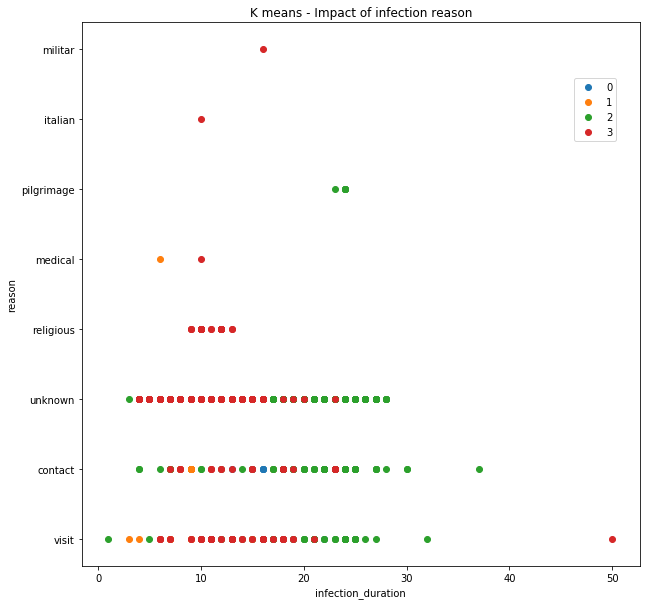

In [46]:
def draw_scatter(df, col_1, col_2, cluster_column, num_clusters, title):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(col_1)
    ax.set_ylabel(col_2)
    labels = list(range(0,num_clusters))
    colors = plt.cm.Spectral(np.linspace(0, 1, num_clusters))
    axs = []
    for i in labels:
        axs.append(ax.scatter(df[df[cluster_column]==i][col_1], df[df[cluster_column]==i][col_2], cmap=colors[i]))
    
    ax.legend(axs, labels, loc='center', bbox_to_anchor=(0.92, 0.84), ncol=1)
    plt.show()

draw_scatter(df, 'infection_duration', 'reason', 'cluster', 
             n_clusters, 'K means - Impact of infection reason')

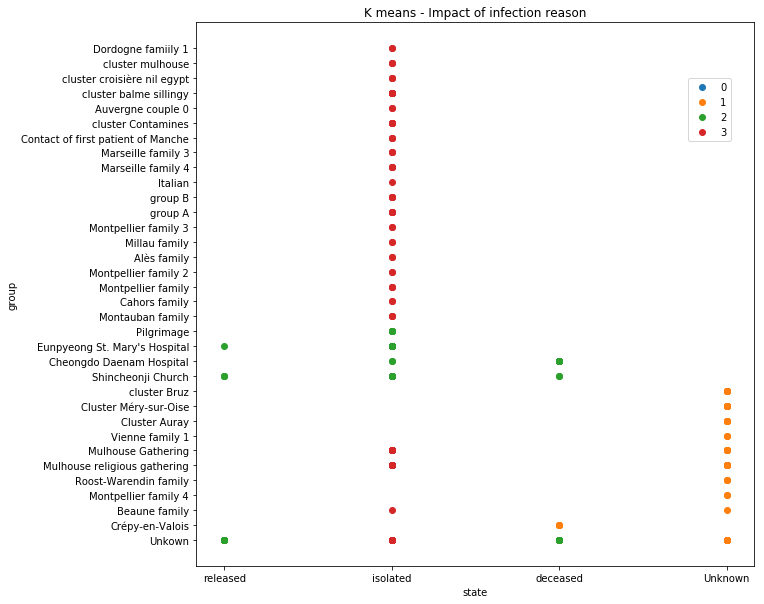

In [133]:
draw_scatter(df, 'state', 'group', 'cluster', 
             n_clusters, 'K means - Impact of infection reason')

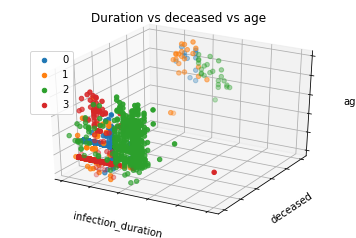

In [128]:
def create_3d_scatter(df, col_1, col_2, col_3, cluster_column, num_clusters, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(title)
    ax.set_xlabel(col_1)
    ax.set_ylabel(col_2)
    ax.set_zlabel(col_3)
    labels = list(range(0,num_clusters))
    colors = plt.cm.Spectral(np.linspace(0, 1, num_clusters))
    axs = []
    for i in labels:
        d = df[df[cluster_column]==i]
        axs.append(ax.scatter(d[col_1], d[col_2], d[col_3], cmap=colors[i]))
    
    ax.legend(axs, labels, bbox_to_anchor=(0.2, 0.5), ncol=1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    plt.show()

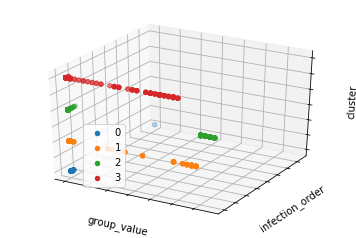

In [130]:
group_values = df['group'].unique()
group_values = dict(zip(group_values, list(range(0,len(group_values)))))
df['group_value'] = df['group'].apply(lambda x: group_values[x])
country_values = df['country'].unique()
country_values = dict(zip(country_values, list(range(0,len(group_values)))))
df['country_value'] = df['country'].apply(lambda x: country_values[x])
create_3d_scatter(df, 'group_value', 'infection_order', 'cluster', 'cluster', n_clusters, '')

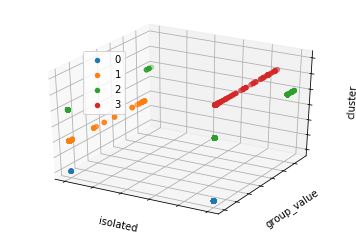

In [132]:
create_3d_scatter(df, 'isolated', 'group_value', 'cluster', 'cluster', n_clusters, '')